# Part II - Ford GoBike System Data
## by Michael Johnson

## Investigation Overview

> This presentation will take a look at key relationships of the bikeshare data.  Some of the things we want to observe are if there is any correlation between the age of the rider and how long they ride, subscriber vs customer relationships, and gender relationships.  

> The graphs below will shows charts relating age and gender, age and duration of riding, and subscriber vs. customer age and duration.


## Dataset Overview and Executive Summary

>This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.  This dataset is from 2019 based on the filename of the data and looks at the location, duration of bike rentals and has a handful of customer variables such as birth year, user type, and gender.

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
bike_data_df = pd.read_csv('201902-fordgobike-tripdata.csv')
bike_data_df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [7]:
#Prep data for Vizualizations
bike_data_df = bike_data_df.dropna()
bike_data_df = bike_data_df.astype({'start_station_id': 'int32', 'end_station_id': 'int32', 'member_birth_year': 'int32'})
ordinal_var_dict = {'user_type': ['Subscriber', 'Customer'],
                   'member_gender': ['Male', 'Female', 'Other'],
                   'bike_share_for_all_trip': ['Yes', 'No']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                               categories = ordinal_var_dict[var])
    bike_data_df[var] = bike_data_df[var].astype(ordered_var)
    
    

## Histogram of riders by Age

> Write a comment about your visualization here.  Make sure your visualizations are polished!

> **Rubric Tip**: Provide at least 3 **polished** visualizations to convey key insights. The total number of visualizations shoould be less than 50% of the number of visualizations in the exploratory analysis. Generally 3-5 visualizations suffice.


> **Rubric Tip**: Each visualization in the slideshow is associated with **descriptive comments** that accurately depict their purpose and your observation. 


> **Rubric Tip**: All plots shown are appropriate, meaning the plot type, encodings, and transformations are suitable to the underlying data. 

> **Rubric Tip**: All plots in the slideshow are polished, meaning all plots have a title, labeled x/y axes (with units), x/y ticks, and legends. 

Text(0.5, 1.0, 'Count of Riders by Age')

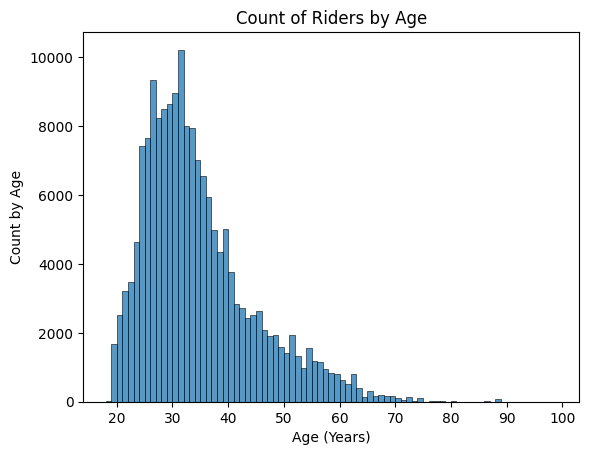

In [19]:
bike_data_df['age'] = 2019 - bike_data_df['member_birth_year']
bins = np.arange(18, 100, 1)
sns.histplot(data=bike_data_df, x='age', bins=bins)
plt.xlabel('Age (Years)')
plt.ylabel('Count by Age')
plt.title('Count of Riders by Age')

# Conclusions

> The majority of riders are between the ages of 25 to 35.  This makes sense as bike riding is more appealing to younger people due to the physical aspect of it.  Due to the physical nature of riding a bike, older people will tend to find a different means of transportation

## Heat Map of Age vs Rental Duration

Text(0.5, 1.0, 'Heat Map of Age vs. Rental Duration')

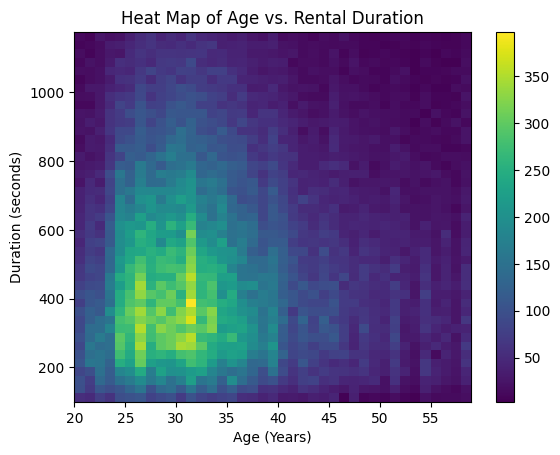

In [21]:
bike_data_sample = bike_data_df.loc[bike_data_df['age'] <= 90]

bins_x = np.arange(20, 60, 1)
bins_y = np.arange(100, 1200, 25)

plt.hist2d(data=bike_data_sample, x='age', y='duration_sec', bins=[bins_x, bins_y])
plt.colorbar()
plt.xlabel('Age (Years)')
plt.ylabel('Duration (seconds)');
plt.title('Heat Map of Age vs. Rental Duration')

## Conclusions

> The heat map shows that the most common age of riders range between 25-40 and that the most common ride times are between 200 seconds to 600 seconds or roughly 3.5-10 minutes.

## Violin Charts

Text(0.5, 1.0, 'Age & Duration vs User Type, Gender, and Entire Trip')

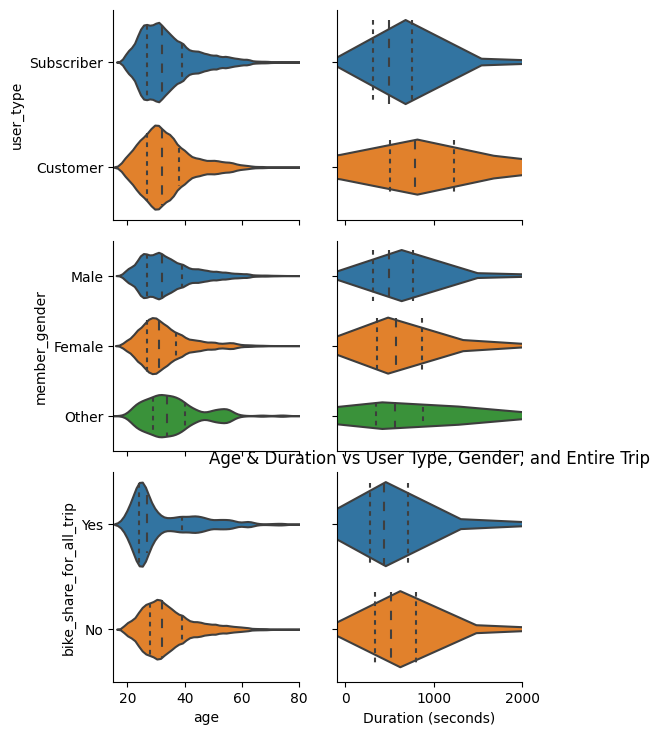

In [26]:
g = sns.PairGrid(data=bike_data_df, x_vars=['age', 'duration_sec'],
                y_vars=['user_type', 'member_gender', 'bike_share_for_all_trip'])
g.map(sns.violinplot, inner='quartile')
g.axes[0,0].set_xlim(15, 80)
g.axes[1,1].set_xlim(-100,2000)

plt.xlabel('Duration (seconds)')
plt.title('Age & Duration vs User Type, Gender, and Entire Trip')

## Conclusions

> One interesting observation from the violin plots was that on average a subscriber had a short bike rental then if the rider was just a customer.  This could be that because if the rider was a one-time customer, they might want to ride as long as they could to feel they get their money's worth.  Whereas if the rider was a subscriber, they could have the peace of mind knowing that if they returned their bike, they could simply rent another one at their convenience.

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_notebook.html or pdf


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
